## Understand the problem statement and business case 

### Facts

1. Hiring and retaining employees are extremely complex tasks that require capital, time and skills.
2. Small business owners spend 40% of their working hours on tasks that do not generate any income such as hiring.
3. Companies spend 15%-20% of the employee's salary to recruit a new candidate.
4. An average company loses anywhere between 1% and 2.5% of their total revenue on the time it takes to bring a new hire up to speed.
5. Hiring a new employee costs an average of 7645 USD (0-500 corporation).
6. It takes 52 days on average to fill a position

### Goal
**Develop a model than could predict which employees are more likely to quit.**

## Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*Note: in Google Colab need to mount your drive.And pass the full link to file containing the dataset.*

``
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/[...].csv')
``

In [2]:
df = pd.read_csv(r'Human_Resources.csv')
df.shape

(1470, 35)

In [3]:
#set limits for columsn and rows for pandas dataframes
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [5]:
#check for the type of data the dataset has
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#describe categorical values
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
#describe numeric values
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Visualize dataset - Exploratory Data Analysis (EDA)

In [8]:
#change boolean columns (Attrition, OverTime, Over18) from categorical to numeric values
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [9]:
#check new valeus
df[['Attrition', 'OverTime', 'Over18']]

,Attrition,OverTime,Over18
0,1,1,1
1,0,0,1
2,1,1,1
3,0,1,1
4,0,0,1
...,...,...,...
1465,0,0,1
1466,0,0,1
1467,0,1,1
1468,0,0,1


In [10]:
#describe distribution
df[['Attrition', 'OverTime', 'Over18']].describe()

,Attrition,OverTime,Over18
count,1470.000000,1470.000000,1470.0
mean,0.161224,0.282993,1.0
std,0.367863,0.450606,0.0
min,0.000000,0.000000,1.0
25%,0.000000,0.000000,1.0
50%,0.000000,0.000000,1.0
75%,0.000000,1.000000,1.0
max,1.000000,1.000000,1.0


<AxesSubplot:>

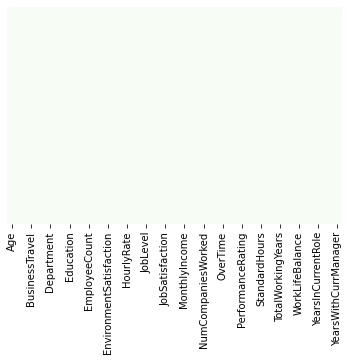

In [11]:
#check for missing data using a heatmap
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Greens')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

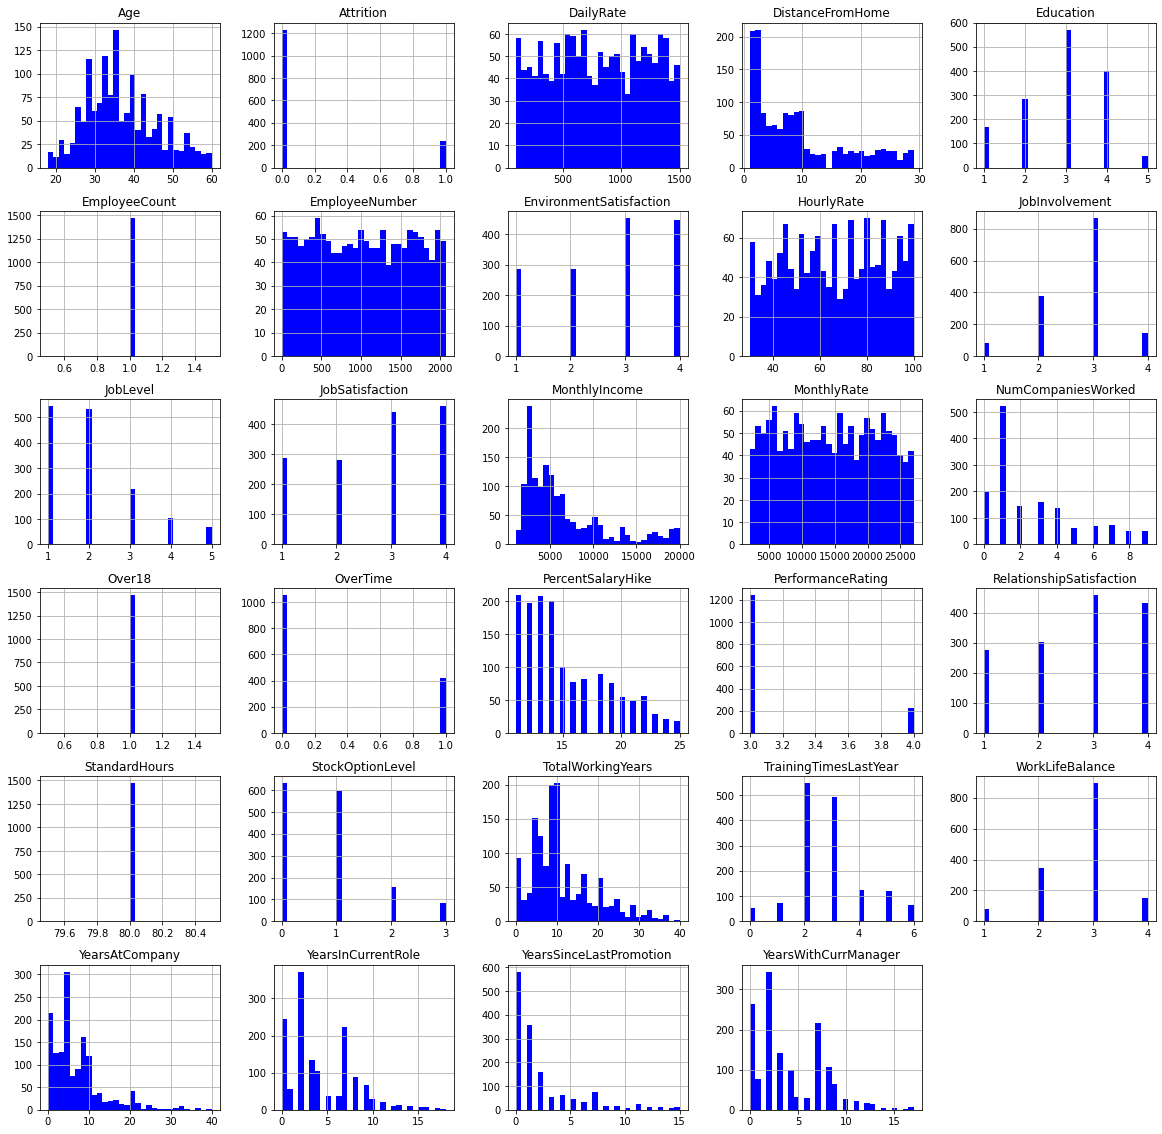

In [12]:
#overview data distribution on histograms
df.hist(bins = 30, figsize = (20, 20), color = 'b')

In [13]:
#dropping meaningless features
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)
df.shape

(1470, 31)

In [14]:
#create a subset for those employees that stayed.
# stayed_df = df[df.Attrition == 0]
stayed_df = df.query("Attrition == 0")
stayed_df.shape

(1233, 31)

In [15]:
#create a subset for those employees that left.
# left_df = df[df.Attrition == 1]
left_df = df.query("Attrition == 1")
left_df.shape

(237, 31)

In [16]:
#check number and % of employees who stayed and left. 
total = len(df)
st_emp = len(stayed_df)
lf_emp = len(left_df)

def percentage(part, total):
    p = part
    t = total
    return 1 * p / t * 100

print(f'Total of employees in the dataset = {total}', end='\n\n')

print(f'Number of employees who stayed = {st_emp}')
print(f'% of employees who stayed = {percentage(st_emp, total)} %', end='\n\n')

print(f'Number of employees who stayed = {lf_emp}')
print(f'% of employees who stayed = {percentage(lf_emp, total)} %')

Total of employees in the dataset = 1470

Number of employees who stayed = 1233
% of employees who stayed = 83.87755102040816 %

Number of employees who stayed = 237
% of employees who stayed = 16.122448979591837 %


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'Stoc

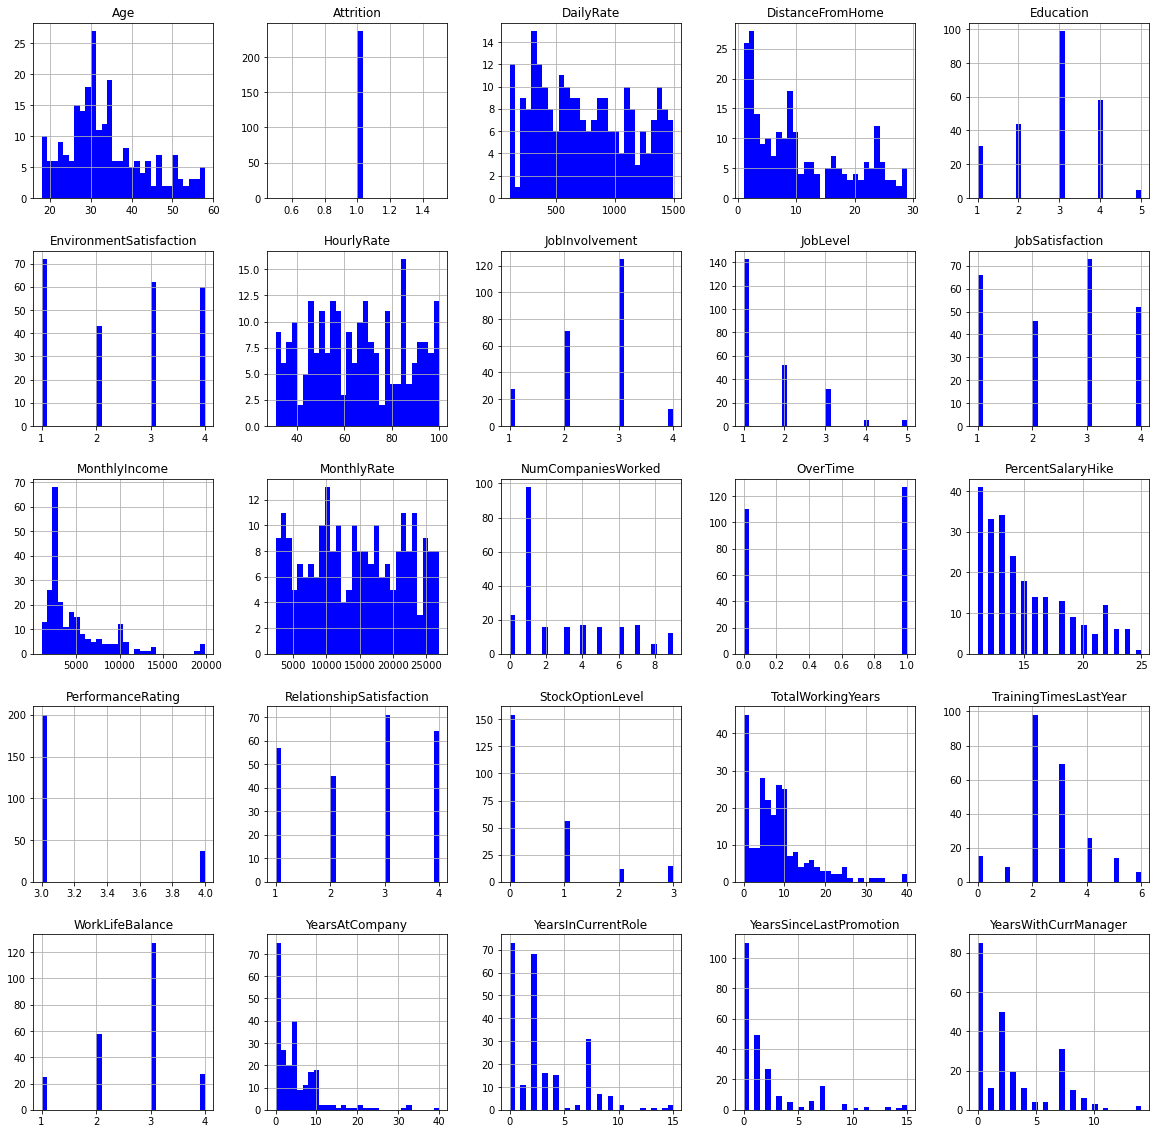

In [17]:
#data distribution for those employees that left. 
df.query("Attrition == 1").hist(bins = 30, figsize = (20, 20), color = 'b')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'Stoc

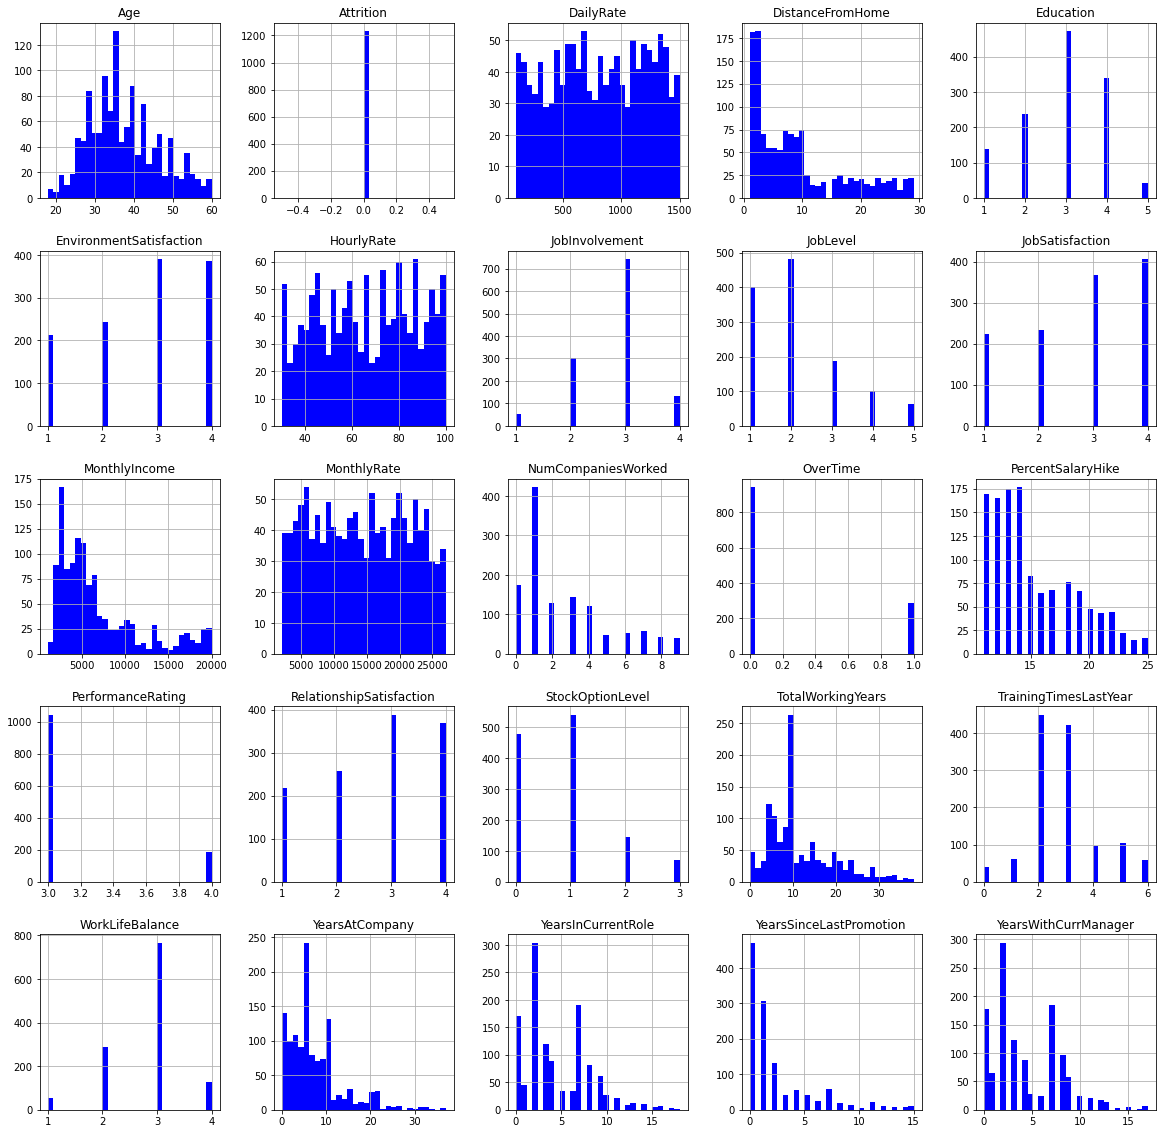

In [18]:
#data distribution for those employees that stayed. 
df.query("Attrition == 0").hist(bins = 30, figsize = (20, 20), color = 'b')

In [19]:
stayed_df[['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel']].describe()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,StockOptionLevel
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.771290,2.778589,0.845093
std,8.888360,403.208379,8.012633,1.071132,1.093277,0.841985
min,18.000000,102.000000,1.000000,1.000000,1.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,817.000000,7.000000,3.000000,3.000000,1.000000
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,1.000000
max,60.000000,1499.000000,29.000000,4.000000,4.000000,3.000000


In [20]:
left_df[['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel']].describe()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,StockOptionLevel
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.464135,2.468354,0.527426
std,9.689350,401.899519,8.452525,1.169791,1.118058,0.856361
min,18.000000,103.000000,1.000000,1.000000,1.000000,0.000000
25%,28.000000,408.000000,3.000000,1.000000,1.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,3.000000,0.000000
75%,39.000000,1092.000000,17.000000,4.000000,3.000000,1.000000
max,58.000000,1496.000000,29.000000,4.000000,4.000000,3.000000


<AxesSubplot:>

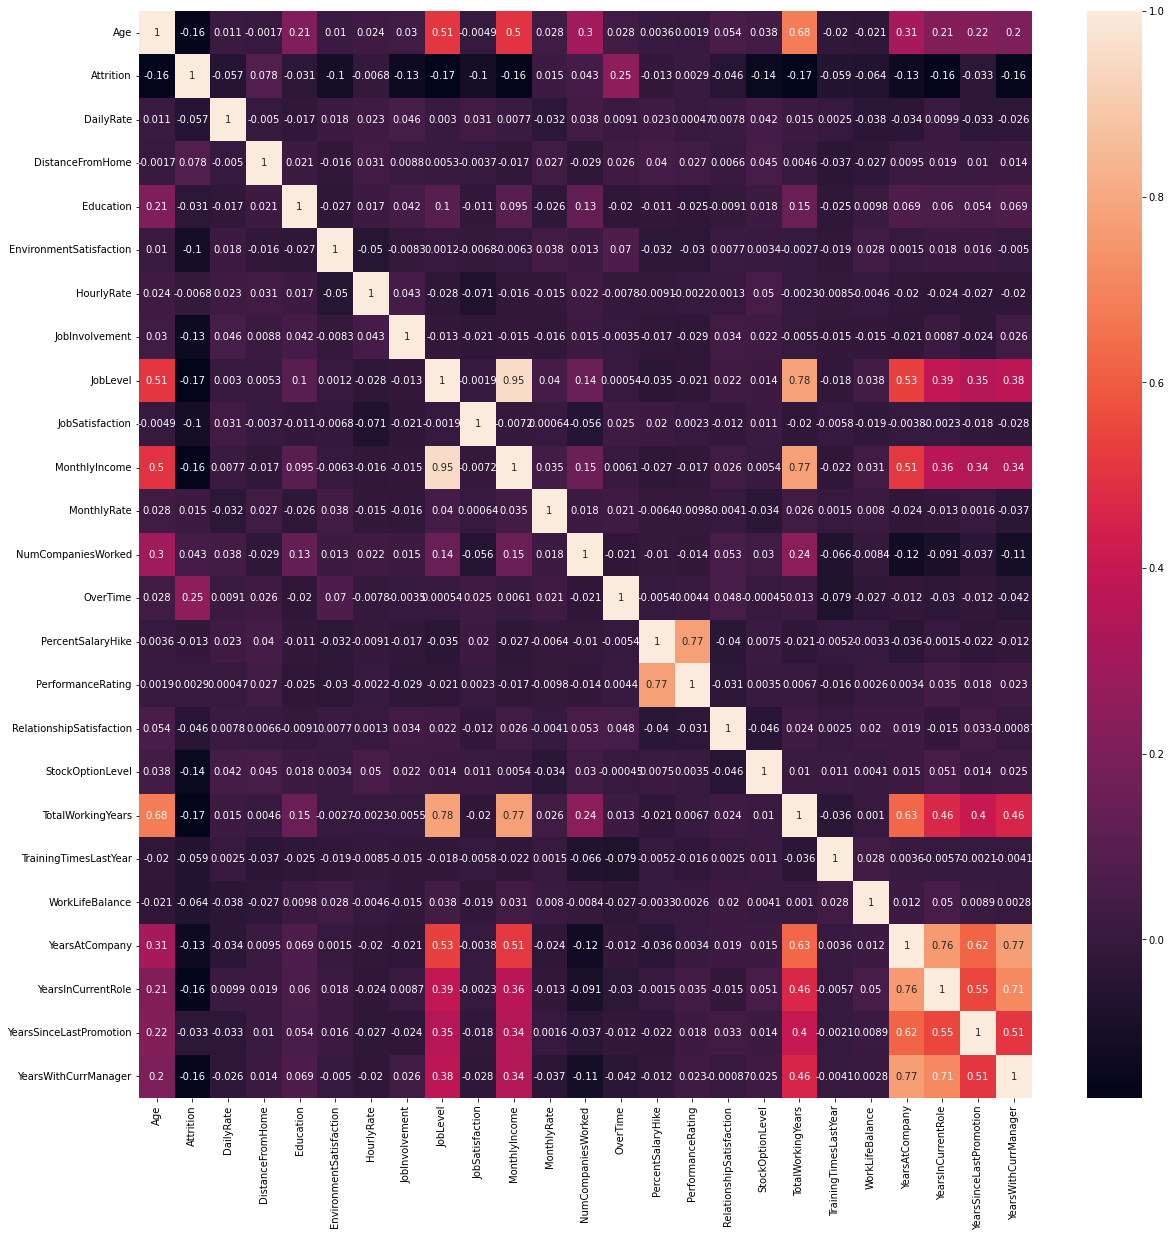

In [21]:
#look at the correlation in the dataset
correlations = df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

#### Conclusions:
1. Job level is strongly correlated with total working years.
2. Monthly income is strongly correlated with Job level.
3. Monthly income is strongly correlated with total working years.
4. Age is strongly correlated to with montly income.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

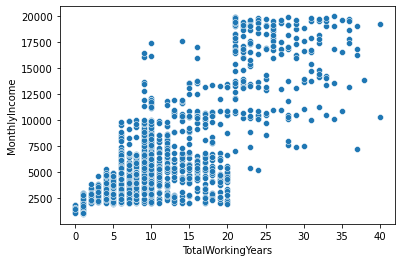

In [22]:
sns.scatterplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = df)

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

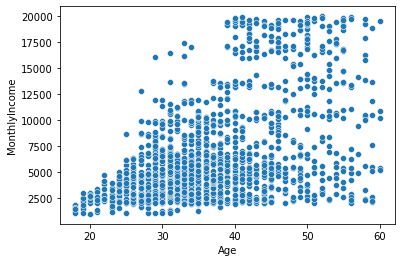

In [23]:
sns.scatterplot(x = 'Age', y = 'MonthlyIncome', data = df)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsInCurrentRole'>

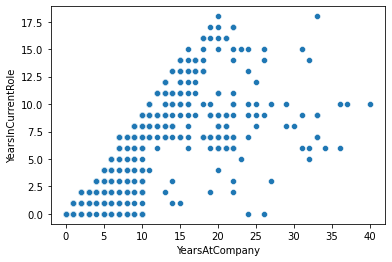

In [24]:
sns.scatterplot(x = 'YearsAtCompany', y = 'YearsInCurrentRole', data = df)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsSinceLastPromotion'>

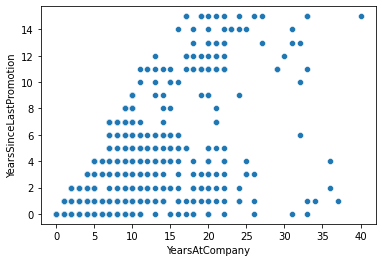

In [25]:
sns.scatterplot(x = 'YearsAtCompany', y = 'YearsSinceLastPromotion', data = df)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsWithCurrManager'>

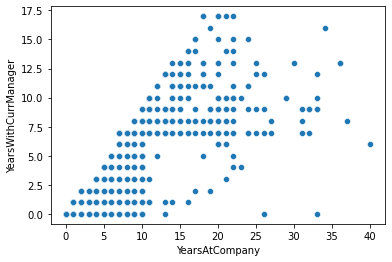

In [26]:
sns.scatterplot(x = 'YearsAtCompany', y = 'YearsWithCurrManager', data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

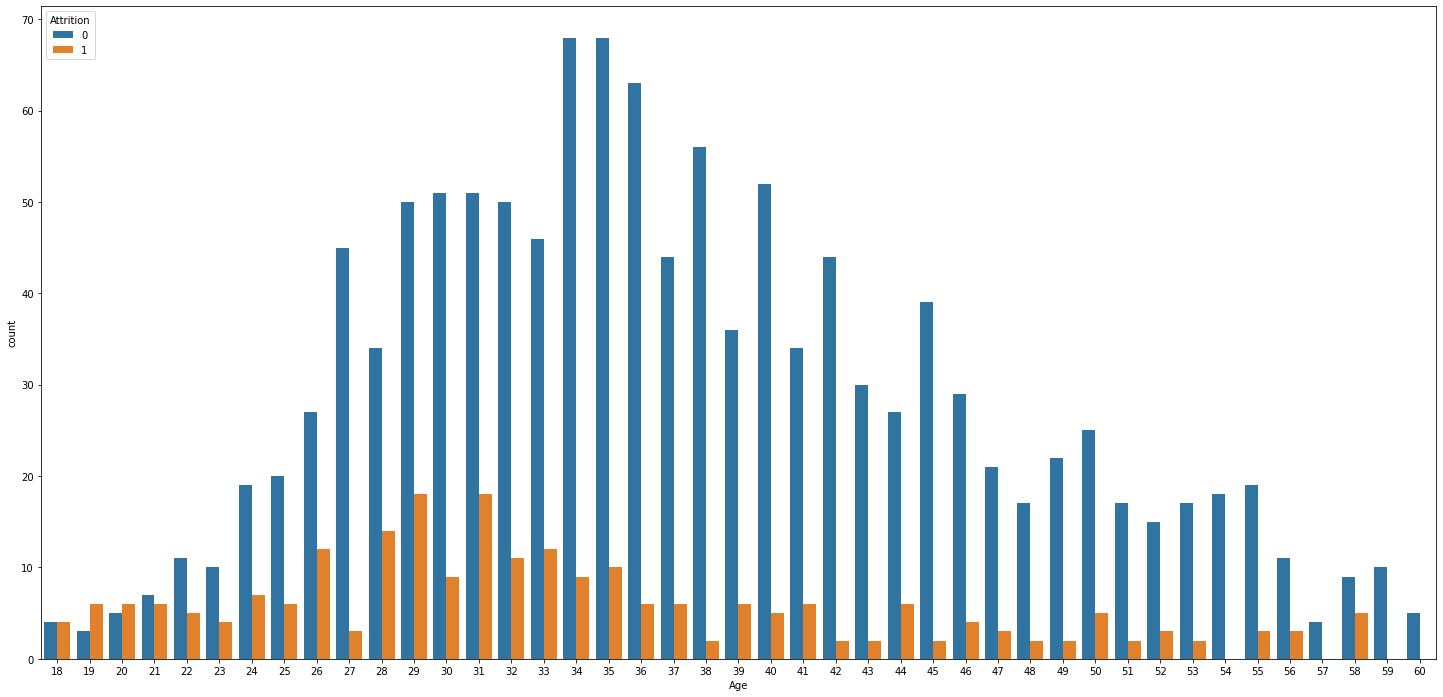

In [27]:
#plot the count of attrition by age
plt.figure(figsize = [25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = df)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

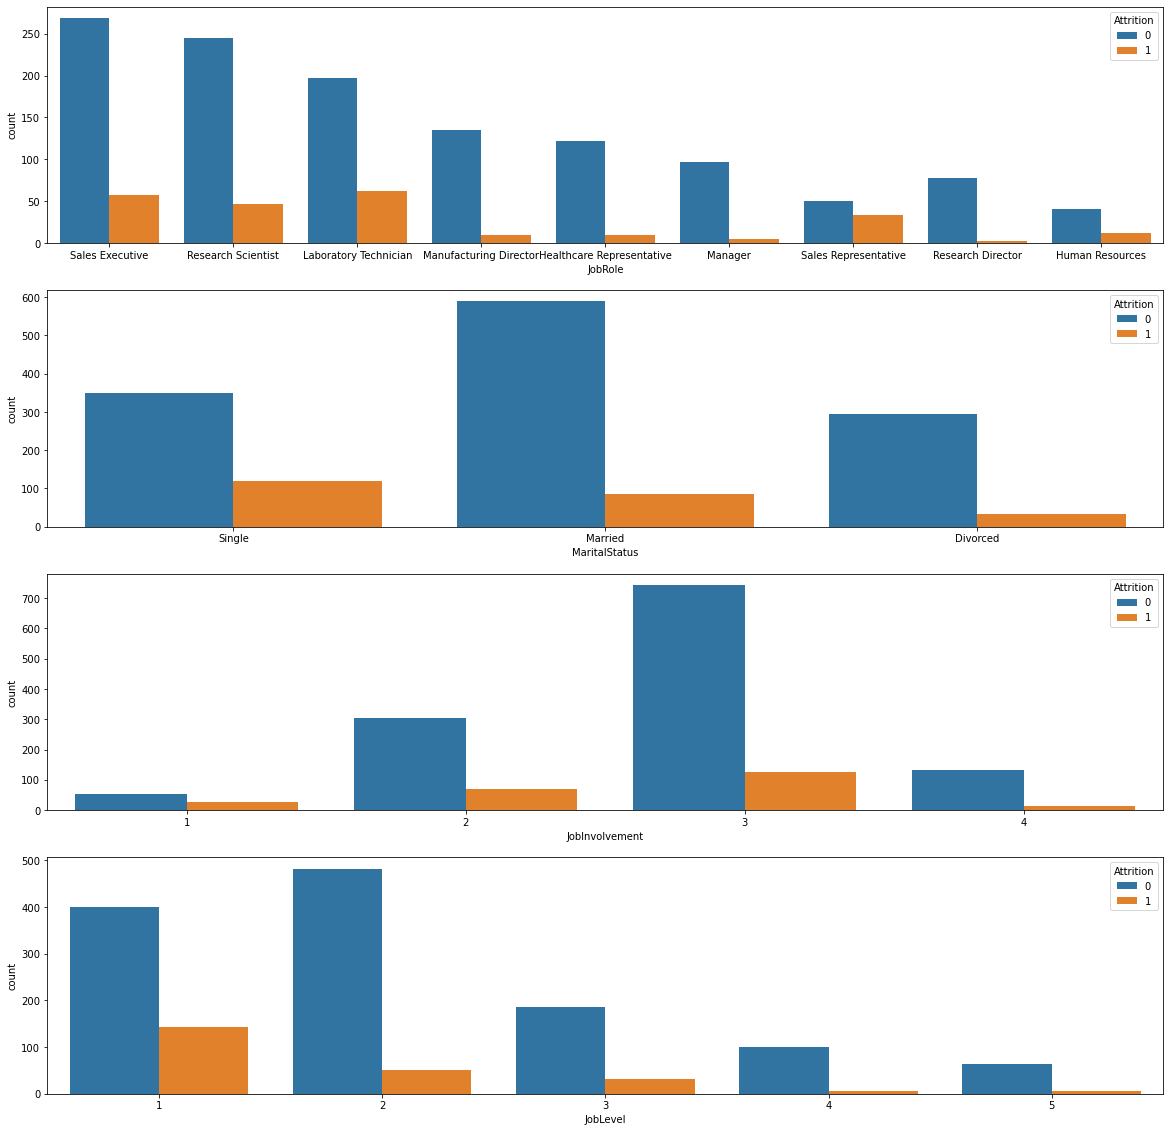

In [28]:
#check other feature counts
plt.figure(figsize = [20, 20])

plt.subplot(411) #4 = nrows, 1 = ncols, 1 = figure num.
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df)

plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)

#### KDE (Kernel Density Estimate)

It is used for visualizing the Probability Density of a continious variable.

In other words, KDE describes the probability density at different values in a continious variable. 

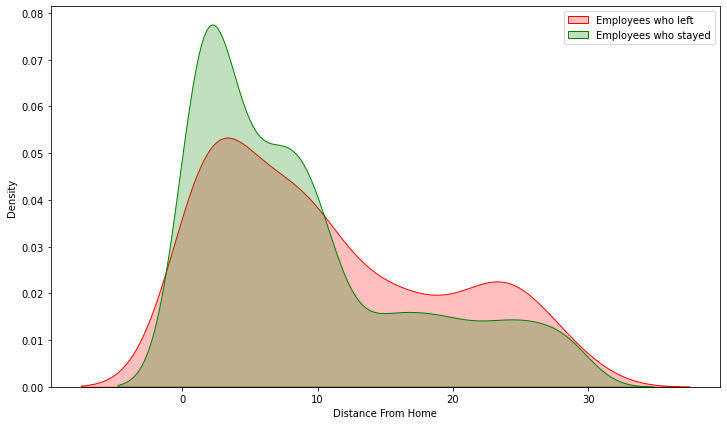

In [29]:
#distance from home and tendecy to left the company
plt.figure(figsize = (12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who stayed', shade = True, color = 'g')

plt.legend()
plt.xlabel('Distance From Home')

plt.show()

The probability of employees who leave the company increases if they live ten or more miles away from work.

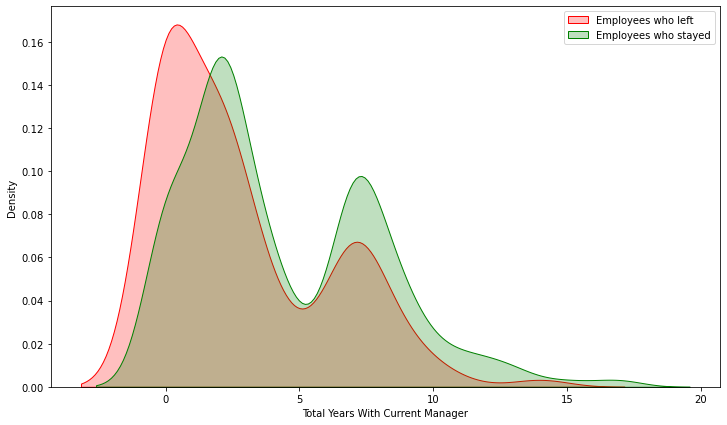

In [30]:
#total years with current manager and tendecy to left the company
plt.figure(figsize = (12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who stayed', shade = True, color = 'g')

plt.legend()
plt.xlabel('Total Years With Current Manager')

plt.show()

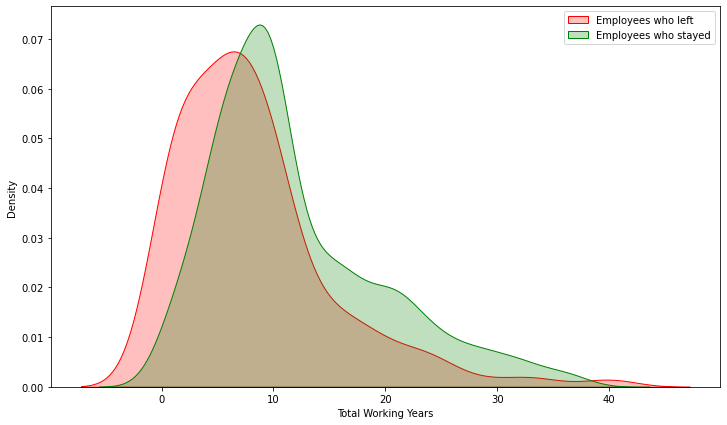

In [31]:
#total working years and tendecy to left the company
plt.figure(figsize = (12,7))

sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who stayed', shade = True, color = 'g')

plt.legend()
plt.xlabel('Total Working Years')

plt.show()

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

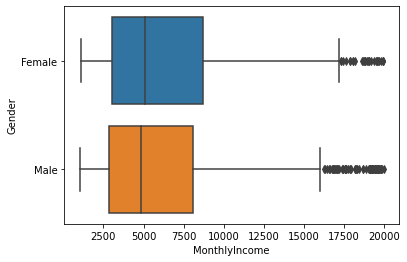

In [32]:
#distribution of Monthly Income in relation to gender
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = df)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

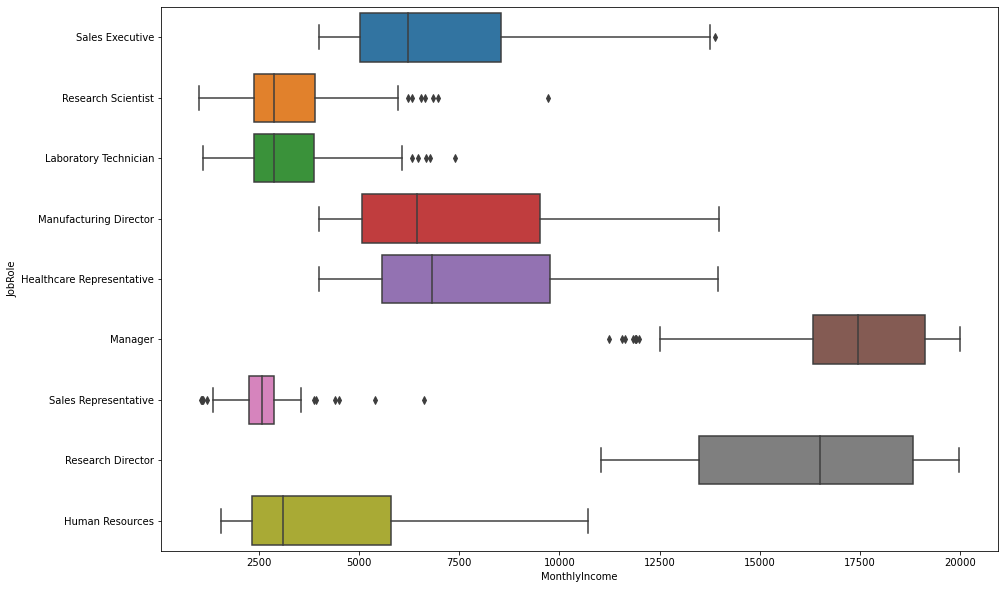

In [33]:
#distribution of Monthly Income in relation to job role
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df)

## Data Cleaning / Wrangling

In [34]:
#separte Categorical data from Continious data
df_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
df_cat.shape

(1470, 6)

In [35]:
#transform categorical data to boolean values
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder() #--> instanciate the object
df_cat = onehotencoder.fit_transform(df_cat).toarray()

In [36]:
#pass the array to a dataframe
df_cat = pd.DataFrame(df_cat)
df_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
#create a dataset with numerical categories without attrition
df_num = df[['Age', 'DailyRate', 'DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]
df_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [38]:
#bring together both dataframes
df_all = pd.concat([df_cat, df_num], axis = 1)
df_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [39]:
#scale the data to ML treats all features equaly
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #--> instanciate the object
X = scaler.fit_transform(df_all)

In [84]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

#### Declare my target value (y)

In [40]:
y = df.Attrition
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Understanding Logistic Regression Classifiers, Artificial Neural Networks, and Random Forest Classifier

####  Logistic Regression Classifiers
    - Logistic Regression is used to predict binary outputs with two possible values labeled 0 or 1
    - It's not the same as Linear Regression which predicts outputs on a continious spectrum. 
    - However, Logistic Regression algorithm works by implementing a linear equation first with independent predictions to predict a value. Then it converts this value into a probability that could range from 0 to 1 
        * Linear equation: y = b0 (intersect) + b1 (slope) * x
        * Sigmond function: P(x) = sigmoid(y) ;  P(x) = 1 / 1 + e^-y ; P(x) = 1 / 1 + e^(b0 + b1 * x)
    - Once we have the probability, then we set a threshold and classify the probability into two groups 0 below threshold and 1 above threshold. 

#### Artificial Neural Networks

    - The elements are inputs, neurons, weiths,  layers, and outputs, which are used in the Non-Linear Sigmoid Activation function: phi(w) = 1 / 1 + e^-w.
    - inputs are the value of x
    - each connection between the neurons has a weight associated (w). They take several values to solve an optimization problem based on the inputs and outputs. 
        * So the goal is to find the optimal value of all the weights to minimize the output error. 
        * This is done on a matrix multiplication of x (inputs) times w (weights).
            - Multiply x for all the values of the weights (w)
            - Then we sum up all the results of the multiplications 
                x(n+1,i) * (t) = phi(Σ w(n,ij) * x(n,j) * (t))
            - And apply an activation function (phi)
                phi(w) = 1 / 1 + e^-w

#### Random Forest Classifiers

    - It uses Decision Trees, which are supervised Machine Learning technique where data is split according to a certain condition / paramenter. It answers two a Yes/No question. 
    - RFC creates a set of decision trees from randomly selected subset of training set. 
    - It then combines the votes (output) from different decision trees to decide the final class of a test object.

## How to assess classifications models based on KPIs

#### To assess classifications models we usually use Confusion Matrix

- On axis 0 (row) we have PREDICTIONS on row 0 positive and row 1 negative
- On axis 1 (column) we have TRUE CLASS on column 0 positive and column 1 negative
- So the matrix is as follow: 
    - in row0-col0 there is TRUE + (TP) == prediction is good because both class and prediction are True. 
    - in row1-col0 there is FALSE - (FN) == bad prediction because the class is True but the prediction is False. 
        - TYPE II ERROR > avoid it at all cost.
    - in row0-col1 there is FALSE + (FP) == also a bad prediction because the class is False but the prediction is True.
        - TYPE I ERROR
    - in row1-col1 there is TRUE - (TN) == which is a good prediction because the class is False and the predictionis False. 
    

    | TRUE+ TP  | FALSE+ FP |
    |-----------|-----------|
    | FALSE- FN | TRUE- TN  |
    
- The ACCURACY is calculated as follow:
    - (TP + TN) / (TP + TN + FP + FN)
    - Accuracy is generally misleading and is not enough to assess the performance of a classifier. 
- The PRECISION is the relation between True Positives and the total predictions when the model prediced true class. In other words, how often the prediction is right. 
    - TP / (TP + FP) *total axis 0 wise*
- The RECALL is the metric that determines the percentage of cases the model matches against reality. 
    - TP / (TP + FN) *total axis 1 wise*
    - Recall is an important KPI in situation where the dataset is highly imbalanced; cases where you have small class compared to the other class. 
    
- F1-SCORE is an overall measure of a model's accuracy that combines precision and recall
    - F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
    - F1 Score = 2 * TP / 2 * TP + FP + FN    

## Train and evaluate a Logistic Regression Classifier

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [42]:
X_train.shape

(1102, 50)

In [43]:
X_test.shape

(368, 50)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
#instatiate and fit the model to train it
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
#test the model
y_pred = model.predict(X_test)

In [47]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
#evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

print(f'Accuracy: {100 * accuracy_score(y_pred, y_test)} %')

Accuracy: 89.94565217391305 %


<AxesSubplot:>

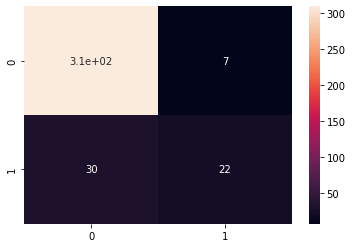

In [78]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       316
           1       0.76      0.42      0.54        52

    accuracy                           0.90       368
   macro avg       0.84      0.70      0.74       368
weighted avg       0.89      0.90      0.89       368



## Train and evaluate a Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred_rfc = model_rfc.predict(X_test)

<AxesSubplot:>

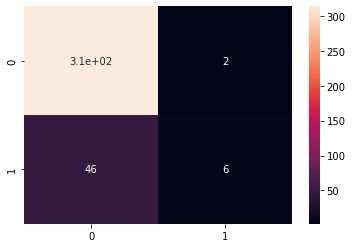

In [80]:
cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot = True)

In [81]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       316
           1       0.75      0.12      0.20        52

    accuracy                           0.87       368
   macro avg       0.81      0.55      0.56       368
weighted avg       0.85      0.87      0.83       368



## Train and evaluate a Deep Learning Model (ANN)

In [63]:
#import AI library / relu = rectify linear units
#!pip install tensorflow
import tensorflow as tf

model_ann = tf.keras.models.Sequential()
model_ann.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (50, )))
model_ann.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model_ann.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model_ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) #output shouldn't be continious that's why choose sigmoid saturated

In [64]:
model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [65]:
#prepare the model
model_ann.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [66]:
#assign the result to a variable to keep track of the performance
epochs_hist = model_ann.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 4s 15ms/step - loss: 0.4300 - accuracy: 0.8267
Epoch 2/100
23/23 [==============================] - 0s 14ms/step - loss: 0.3461 - accuracy: 0.8639
Epoch 3/100
23/23 [==============================] - 0s 14ms/step - loss: 0.3178 - accuracy: 0.8775
Epoch 4/100
23/23 [==============================] - 0s 14ms/step - loss: 0.2858 - accuracy: 0.8884
Epoch 5/100
23/23 [==============================] - 0s 14ms/step - loss: 0.2617 - accuracy: 0.8956
Epoch 6/100
23/23 [==============================] - 0s 14ms/step - loss: 0.2874 - accuracy: 0.8848
Epoch 7/100
23/23 [==============================] - 0s 15ms/step - loss: 0.2280 - accuracy: 0.9174
Epoch 8/100
23/23 [==============================] - 0s 14ms/step - loss: 0.2218 - accuracy: 0.9102
Epoch 9/100
23/23 [==============================] - 0s 16ms/step - loss: 0.1923 - accuracy: 0.9256
Epoch 10/100
23/23 [==============================] - 0s 14ms/step - loss: 0.1619 - accuracy: 0.9383

Epoch 80/100
23/23 [==============================] - 0s 15ms/step - loss: 1.3280e-05 - accuracy: 1.0000
Epoch 81/100
23/23 [==============================] - 0s 15ms/step - loss: 1.2884e-05 - accuracy: 1.0000
Epoch 82/100
23/23 [==============================] - 0s 15ms/step - loss: 1.2393e-05 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 0s 15ms/step - loss: 1.1934e-05 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 0s 15ms/step - loss: 1.1553e-05 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 0s 15ms/step - loss: 1.1106e-05 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 0s 14ms/step - loss: 1.0648e-05 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 0s 14ms/step - loss: 1.0258e-05 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 0s 14ms/step - loss: 9.8837e-06 - accuracy: 1.0000
Epoch 89/100
23/23 [==============================] - 0

In [67]:
y_pred_ann = model_ann.predict(X_test)
#threshold
y_pred_ann = (y_pred_ann > 0.5)

12/12 [==============================] - 0s 7ms/step


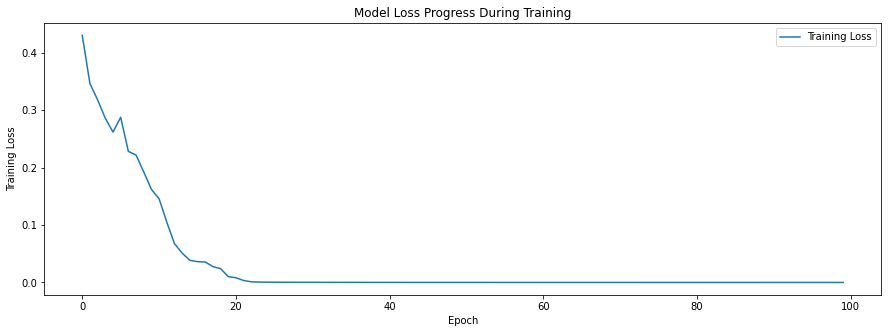

In [74]:
#plot the loss through the epochs
plt.figure(figsize = (15,5))
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()

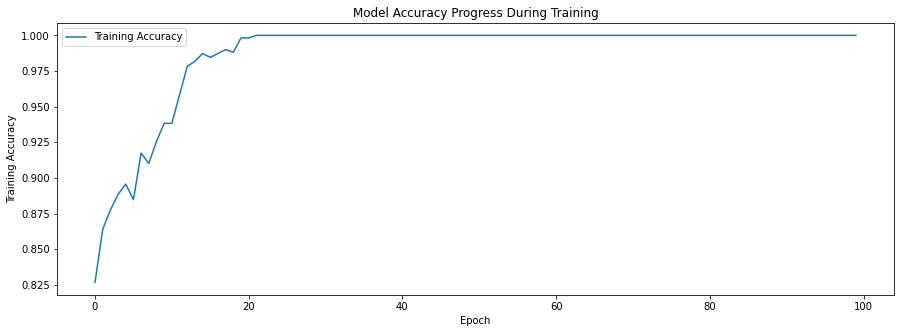

In [73]:
plt.figure(figsize = (15,5))
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])
plt.show()

<AxesSubplot:>

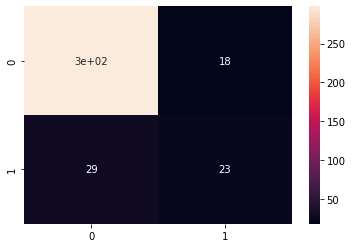

In [82]:
cm = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm, annot=True)

In [77]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       316
           1       0.56      0.44      0.49        52

    accuracy                           0.87       368
   macro avg       0.74      0.69      0.71       368
weighted avg       0.86      0.87      0.87       368

